## COVID 19 Tracker : GeoPlot ##

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import geopandas as gpd

from bs4 import BeautifulSoup
from prettytable import PrettyTable




**Web Scraping**

Tried fetching the data via BeautifulSoup from table data, but realised they changed the code to fetch data from an API. 

//The new code put the old table in comments, so the tbody tag was unreachable.

Hence, rewrote the code to fetch data from the API endpoint itself!

In [3]:
##Soup - doesn't work for me! Maybe I am doing something wrong?
url = 'https://www.mohfw.gov.in/'
# make a GET request to fetch the raw HTML content
web_content = requests.get(url).content
# parse the html content
soup = BeautifulSoup(web_content, "html.parser")
# remove any newlines and extra spaces from left and right
extract_contents = lambda row: [x.text.replace('\n', '') for x in row]
# find all table rows and data cells within
stats = [] 
all_rows = soup.find_all('tr')
for row in all_rows:
    stat = extract_contents(row.find_all('td')) 
# notice that the data that we require is now a list of length 5
    if len(stat) == 5:
        stats.append(stat)
#now convert the data into a pandas dataframe for further processing
new_cols = ["Sr.No", "States/UT","Confirmed","Recovered","Deceased"]
state_data = pd.DataFrame(data = stats, columns = new_cols)
state_data.head()

,Sr.No,States/UT,Confirmed,Recovered,Deceased


**GET: from API endpoint**

A little digging in the web source of https://www.mohfw.gov.in/ and I found a function that makes an API call. 
Pasted it on my browser and looks like no authorization is required! Woohoo!

In [4]:
url =  "https://www.mohfw.gov.in/data/datanew.json"
headers = { }

response = requests.get(url, headers=headers)

if (response.status_code != 200):
    print(str(response.text.encode('utf8'))+"Something went wrong fetching the data")
    sys.exit()
data = json.loads(response.content)

#print(json.dumps(data,indent = 1))

In [5]:
print(type(data))
## Let's see how in which data-type this data got dumped as! 

<class 'list'>


In [6]:
df = pd.DataFrame(data)
df.head()

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
0,2,Andaman and Nicobar Islands,73,4758,4624,61,81,4773,4631,61,35
1,1,Andhra Pradesh,5910,871972,859029,7033,5626,872288,859624,7038,28
2,3,Arunachal Pradesh,735,16395,15605,55,707,16415,15653,55,12
3,4,Assam,3552,213759,209214,993,3585,213925,209345,995,18
4,5,Bihar,5563,238106,231248,1295,5467,238648,231884,1297,10


In [7]:
df.dtypes

sno             object
state_name      object
active          object
positive        object
cured           object
death           object
new_active      object
new_positive    object
new_cured       object
new_death       object
state_code      object
dtype: object

In [8]:
df['active']=df['active'].map(int)
df['positive']=df['positive'].map(int)
df['cured']=df['cured'].map(int)
df['death']=df['death'].map(int)
df['new_active']=df['new_active'].map(int)
df['new_positive']=df['new_positive'].map(int)
df['new_cured']=df['new_cured'].map(int)
df['new_death']=df['new_death'].map(int)

In [9]:
df.dtypes

sno             object
state_name      object
active           int64
positive         int64
cured            int64
death            int64
new_active       int64
new_positive     int64
new_cured        int64
new_death        int64
state_code      object
dtype: object

In [10]:
print(df["state_name"])

0                  Andaman and Nicobar Islands
1                               Andhra Pradesh
2                            Arunachal Pradesh
3                                        Assam
4                                        Bihar
5                                   Chandigarh
6                                 Chhattisgarh
7     Dadra and Nagar Haveli and Daman and Diu
8                                        Delhi
9                                          Goa
10                                     Gujarat
11                                     Haryana
12                            Himachal Pradesh
13                           Jammu and Kashmir
14                                   Jharkhand
15                                   Karnataka
16                                      Kerala
17                                      Ladakh
18                                 Lakshadweep
19                              Madhya Pradesh
20                                 Maharashtra
21           

In [11]:
india_map = gpd.read_file(r'/Users/jharnadohotia/ML - Prophet/india_map/Indian_States.shp')

In [12]:
india_map.head()

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [13]:
india_map = india_map.rename(columns = {'st_nm':'state_name'})

In [14]:
print(india_map['state_name'])

0     Andaman & Nicobar Island
1           Arunanchal Pradesh
2                        Assam
3                        Bihar
4                   Chandigarh
5                 Chhattisgarh
6       Dadara & Nagar Havelli
7                  Daman & Diu
8                          Goa
9                      Gujarat
10                     Haryana
11            Himachal Pradesh
12             Jammu & Kashmir
13                   Jharkhand
14                   Karnataka
15                      Kerala
16                 Lakshadweep
17              Madhya Pradesh
18                 Maharashtra
19                     Manipur
20                   Meghalaya
21                     Mizoram
22                    Nagaland
23                NCT of Delhi
24                  Puducherry
25                      Punjab
26                   Rajasthan
27                      Sikkim
28                  Tamil Nadu
29                   Telangana
30                     Tripura
31               Uttar Pradesh
32      

In [15]:
india_map["state_name"].replace("Andaman & Nicobar Island",
                              "Andaman and Nicobar Islands", inplace = True)
india_map["state_name"].replace("NCT of Delhi",
                              "Delhi", inplace = True)
india_map["state_name"].replace("Telangana",
                              "Telengana", inplace = True)
india_map["state_name"].replace("Jammu & Kashmir",
                              "Jammu and Kashmir", inplace = True)
india_map["state_name"].replace("Arunanchal Pradesh",
                              "Arunachal Pradesh", inplace = True)

In [16]:
india_data = india_map.merge(df, on="state_name", how = 'inner')

<Figure size 432x288 with 0 Axes>

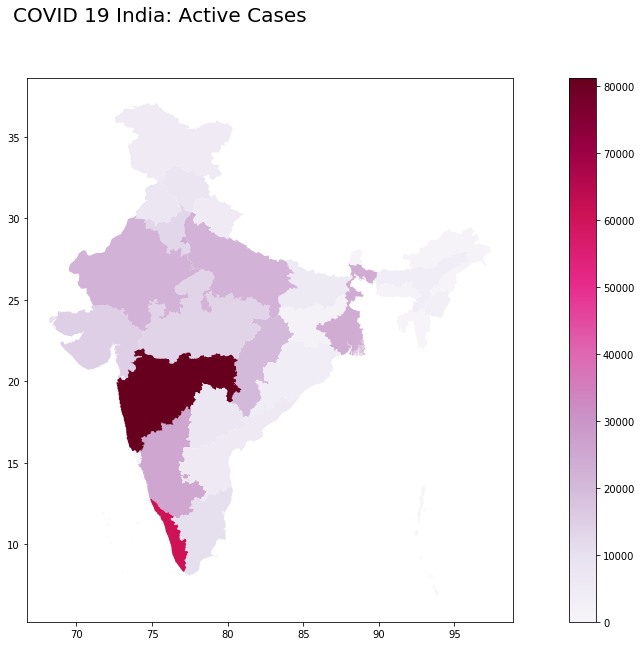

In [18]:
fig = plt.figure()
india_data.plot(column = 'active',figsize=(20, 10),cmap = "PuRd", legend=True)
plt.suptitle('COVID 19 India: Active Cases',fontsize=20)
plt.show()

<Figure size 432x288 with 0 Axes>

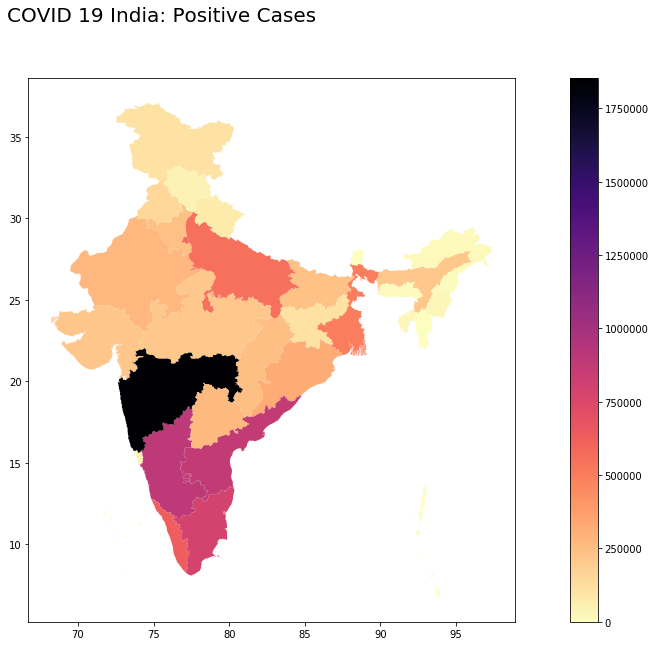

In [19]:
fig = plt.figure()
india_data.plot(column = 'positive',figsize=(20, 10),cmap = "magma_r", legend=True)
plt.suptitle('COVID 19 India: Positive Cases',fontsize=20)
plt.show()

<Figure size 432x288 with 0 Axes>

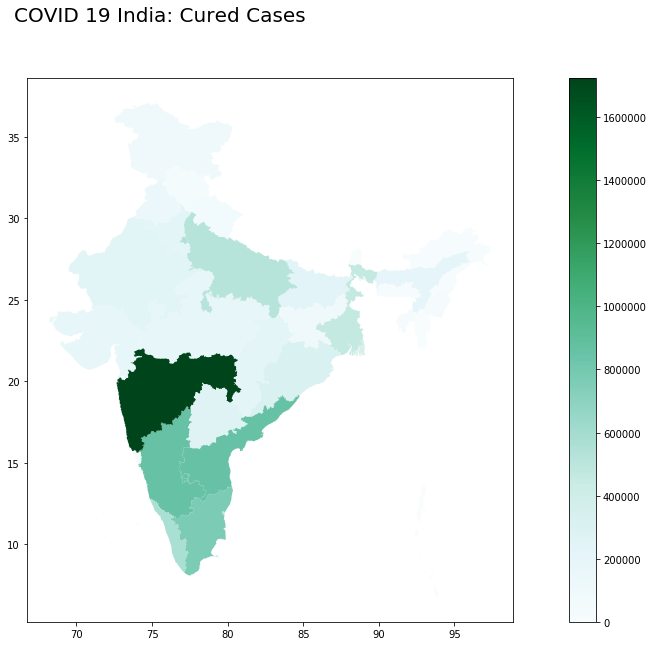

In [20]:
fig = plt.figure()
india_data.plot(column = 'cured',figsize=(20, 10),cmap = "BuGn", legend=True)
plt.suptitle('COVID 19 India: Cured Cases',fontsize=20)
plt.show()

<Figure size 432x288 with 0 Axes>

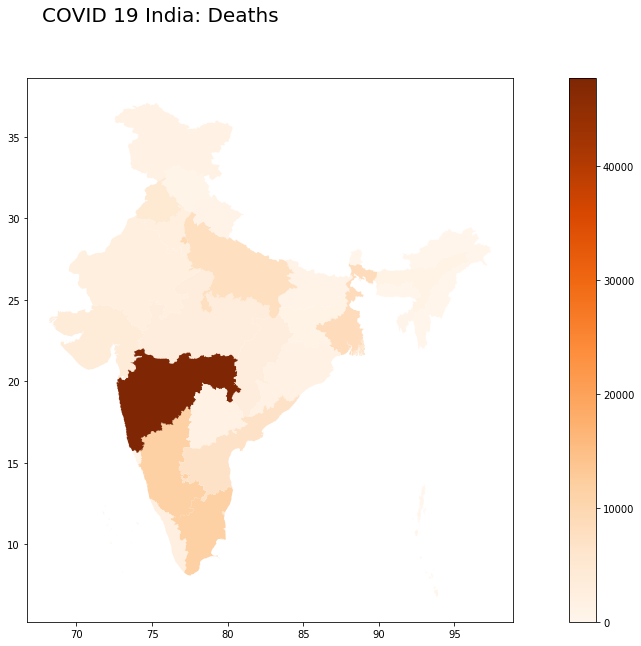

In [21]:
fig = plt.figure()
india_data.plot(column = 'death',figsize=(20, 10),cmap = "Oranges", legend=True)
plt.suptitle('COVID 19 India: Deaths',fontsize=20)
plt.show()